In [129]:
import numpy as np
import math
from scipy.stats import norm
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [137]:
S0 = 2.438                               # Initial stock price
K = 2.438                                # Strike price for conversion
tau = 1                                  # Time to maturity (in years)
r = b = 0.05062
sigma = 0.35725                          # Volatility 
q = 0
dt = 1
N = 5

In [138]:
def black_scholes(S, b, r, tau, sigma, K, option_type = 'call'):
    d1 = (np.log(S/K)+(b+(sigma**2/2)*tau))/(sigma*np.sqrt(tau))
    d2 = d1 - (sigma * np.sqrt(tau))
    if option_type == 'call':
        BSM = S*np.exp((b-r)*tau) * norm.cdf(d1) - K * np.exp(-r*tau) * norm.cdf(d2)
        #print(BSM_call)
    elif option_type == 'put':
        BSM = K * np.exp(-r*tau) * norm.cdf(-d2) - S * np.exp((b-r)*tau) * norm.cdf(-d1)
        #print(BSM_put)
    return BSM

In [139]:
black_scholes(S0, b, r, tau, sigma, K, option_type = 'put')

0.28027144674723736

In [140]:
import math
from scipy.stats import norm

# Black-Scholes-Merton formula
d1 = (math.log(S0 / K) + (r + sigma**2 / 2) * tau) / (sigma * math.sqrt(tau))
d2 = d1 - sigma * math.sqrt(tau)

# Calculate Call and Put option prices
Call = S0 * norm.cdf(d1) - K * math.exp(-r * tau) * norm.cdf(d2)
Put = K * math.exp(-r * tau) * norm.cdf(-d2) - S0 * norm.cdf(-d1)

# Display the results
print(f"Call Option price: {Call:.2f}")
print(f"Put Option price: {Put:.2f}")


Call Option price: 0.40
Put Option price: 0.28


In [141]:
z = -1       # Option type (-1 for put, 1 for call)

In [142]:

# 1. Generalized Black-Scholes (GBS) Formula – European Option
d1 = (math.log(S0 / K) + (r - q + sigma**2 / 2) * tau) / (sigma * math.sqrt(tau))
d2 = d1 - sigma * math.sqrt(tau)
Exact_Price = z * (S0 * math.exp(-q * tau) * norm.cdf(z * d1)) - z * (K * math.exp(-r * tau) * norm.cdf(z * d2))

print(f"Exact European Option Price (GBS): {Exact_Price:.2f}")

# 2. GBS CRR Binomial Tree for European Option
dt = tau / N
u = math.exp(sigma * math.sqrt(dt))
d = 1 / u
p = (math.exp((r - q) * dt) - d) / (u - d)

# Initialize option values at maturity
OptionValue = [max(0, z * (S0 * (u ** i) * (d ** (N - i)) - K)) for i in range(N + 1)]

# Step back through the tree
for j in range(N - 1, -1, -1):
    for i in range(j + 1):
        AssetPrice = S0 * (u ** i) * (d ** (j - i))
        OptionValue[i] = (p * OptionValue[i + 1] + (1 - p) * OptionValue[i]) * math.exp(-r * dt)

EUCRROptionPrice = OptionValue[0]
print(f"European Option Price (CRR Binomial Tree): {EUCRROptionPrice:.2f}")

# 3. Early Exercise Feature in CRR Binomial Tree – American Option Pricing
# Re-initialize option values at maturity
OptionValue = [max(0, z * (S0 * (u ** i) * (d ** (N - i)) - K)) for i in range(N + 1)]

# Step back through the tree with early exercise consideration
for j in range(N - 1, -1, -1):
    for i in range(j + 1):
        AssetPrice = S * (u ** i) * (d ** (j - i))
        OptionValue[i] = max((p * OptionValue[i + 1] + (1 - p) * OptionValue[i]) * math.exp(-r * dt), z * (AssetPrice - X))

AMCRROptionPrice = OptionValue[0]
print(f"American Option Price (CRR Binomial Tree with Early Exercise): {AMCRROptionPrice:.2f}")


Exact European Option Price (GBS): 0.28
European Option Price (CRR Binomial Tree): 0.30
American Option Price (CRR Binomial Tree with Early Exercise): 40.00


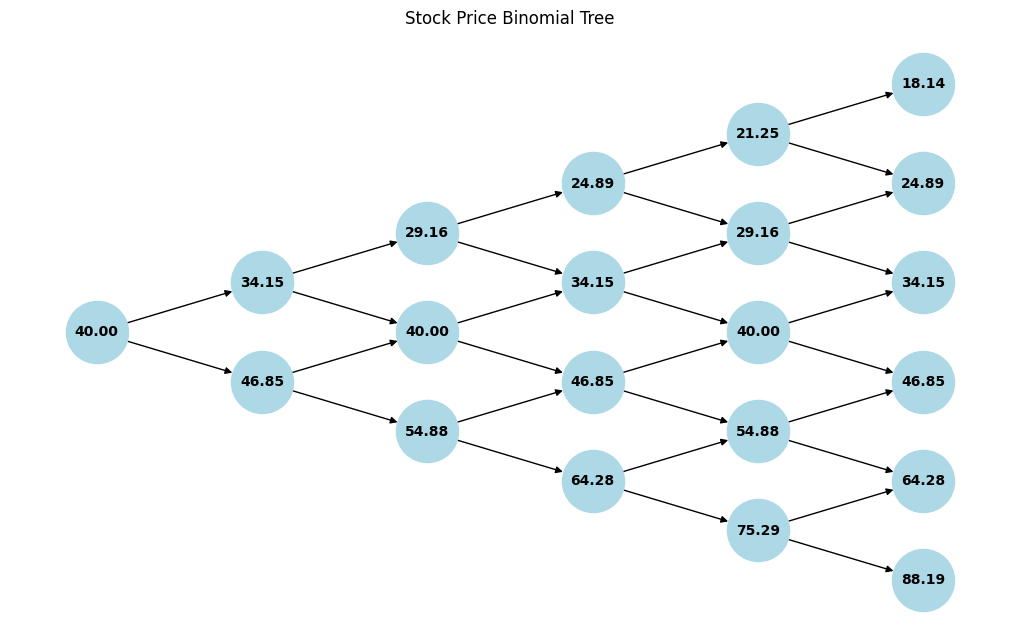

In [143]:
S0 = 40                               # Initial stock price
K = 50                                # Strike price for conversion
tau = 2                               # Time to maturity (in years)
r = 0.06
sigma = 0.25                          # Volatility
q = 0.01
b = r - q
dt = 1
N = 5

z = -1        # Option type (-1 for put, 1 for call)
N = 5         # Number of steps in the tree

# Calculate parameters for the CRR model
dt = tau / N
u = np.exp(sigma * np.sqrt(dt))      # Up factor
d = 1 / u                            # Down factor
p = (np.exp(r * dt) - d) / (u - d)   # Risk-neutral probability

# Initialize graph
G = nx.DiGraph()
positions = {}  # To store positions for each node for plotting
labels = {}     # Labels for each node with asset price

# Build the tree
for j in range(N + 1):
    for i in range(j + 1):
        # Calculate the asset price at this node
        asset_price = S0 * (u ** i) * (d ** (j - i))
        node = (j, i)  # node identifier (time step, node index at that step)
        
        # Add the node to the graph
        G.add_node(node)
        
        # Calculate position: x is the time step, y centers each level
        positions[node] = (j, -i + (j / 2))
        labels[node] = f"{asset_price:.2f}"

# Create edges for the tree
for j in range(N):
    for i in range(j + 1):
        G.add_edge((j, i), (j + 1, i))         # Down move
        G.add_edge((j, i), (j + 1, i + 1))     # Up move

# Plotting
plt.figure(figsize=(10, 6))
nx.draw(G, pos=positions, with_labels=False, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold", edge_color="black")
nx.draw_networkx_labels(G, pos=positions, labels=labels, font_size=10, font_weight="bold", font_color="black")

# Adding titles and labels for clarity
plt.title("Stock Price Binomial Tree")
plt.xlabel("Time Step")
plt.ylabel("Asset Price Nodes")
plt.show()
